In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the customer_value_analysis.csv into the variable customer_df.
customer_df = pd.read_csv('customer_value_analysis.csv')

# 3. First look at its main features (head, shape, info).
display(customer_df.shape)
customer_df.dtypes

(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# 4. Rename the columns so they follow the PE8 (snake case: lowercase_with_underscores).

def rename_column_names(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function renames the columns of a pd.DataFrame following the PE8.
    Input: pd.DataFrame
    Output: Renamed pd.DataFrame
    '''
    
    updated_columns = {}
    for column in df.columns:
        updated_columns[column] = column.lower().replace(" ", "_")

    df.rename(columns = updated_columns, inplace = True)
    return df

In [5]:
customer_df = rename_column_names(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# 5. Change the type of effective_to_date column to DateTime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format = '%m/%d/%y')

In [9]:
# 6. Check NaN values per column.

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
# 7.Define a function that given an input dataframe, returns two dataframes: 
# one with numerical columns and another with categorical columns of the input dataframe.

def df_split(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function splits a pd.DataFrame based on their columns dtype.
    Input: pd.DataFrame
    Output: Two pd.DataFrames, one for numerical values and other for object. 
    '''
    
    numerical = df.select_dtypes(include = np.number)
    categorical = df.select_dtypes(include = object)
    return numerical, categorical


In [11]:
numerical, categorical = df_split(customer_df)

In [12]:
def to_round(df: pd.DataFrame, columns_to_round: list) -> pd.DataFrame:
    '''
    This function rounds your float number in determined column(s). 
    '''
    
    for column in columns_to_round:
        df[column] =  df[column].round(2)
    return df

In [13]:
columns_to_round = ["customer_lifetime_value", "total_claim_amount" ]
numerical = to_round(numerical, columns_to_round)

In [14]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


In [15]:
# 8. Drop any ID column.

categorical = categorical.drop('customer', axis = 1)

In [16]:
# 9. Get the correlation matrix for the numerical variables. 
# What is the pair of numerical variables that have the highest correlation? It makes sense, why?

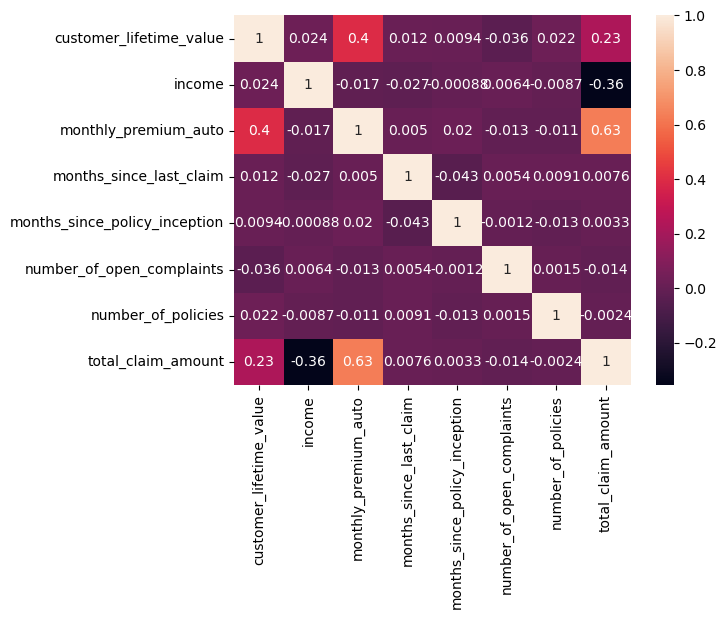

In [17]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot = True) 
plt.show()

In [18]:
# the pair with the highest correlation is total_claim_amount and monthly_premium_auto -> in terms of insurance it would make sense
# if you pay more in your insurance plan, your claim range will be bigger.

In [19]:
# 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
# the first containing numerical continuous columns and the second containing numerical discrete columns of 
# the input dataframe. 
# To this end, it might be helpful to count the number of unique values. 
# The function must have an optional argument set by default to 36 to discriminate between continuous 
# and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

numerical.nunique()

customer_lifetime_value          7996
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               4946
dtype: int64

In [20]:
def num_split(df: pd.DataFrame, optional_arg = 36 ) -> pd.DataFrame:
    '''
    This function splits a pd.DataFrame into two: one is a numerical discrete and the other is a numerical countinous,
    using a optional argument to split it based on the number of unique values for each column. 
    Input: pd.DataFrame
    Output: Two pd.DataFrames: One numerical discrete and the other numerical continuous
    '''
    
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    for column in df.columns:
        if df[column].nunique() > optional_arg:
            continuous_df[column] = df[column]
        else:
            discrete_df[column] = df[column]
            
    return discrete_df, continuous_df

In [21]:
discrete_df, continuous_df = num_split(numerical)

In [22]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [23]:
# 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, 
# and set the figuresize = (16,16).

In [24]:
def count_plot(df: pd.DataFrame) -> None:
    '''
    This function creates count plots for all the columns given in a pd.DataFrame.
    Input: pd.DataFrame
    Output: Countplot for each column. 
    '''
    
    for column in df.columns:
        fig, axes = plt.subplots(1, 1, figsize = (16, 16))
        sns.countplot(data=df, x = column, ax = axes)
        axes.set_title(column)
        plt.tight_layout()
        plt.show()

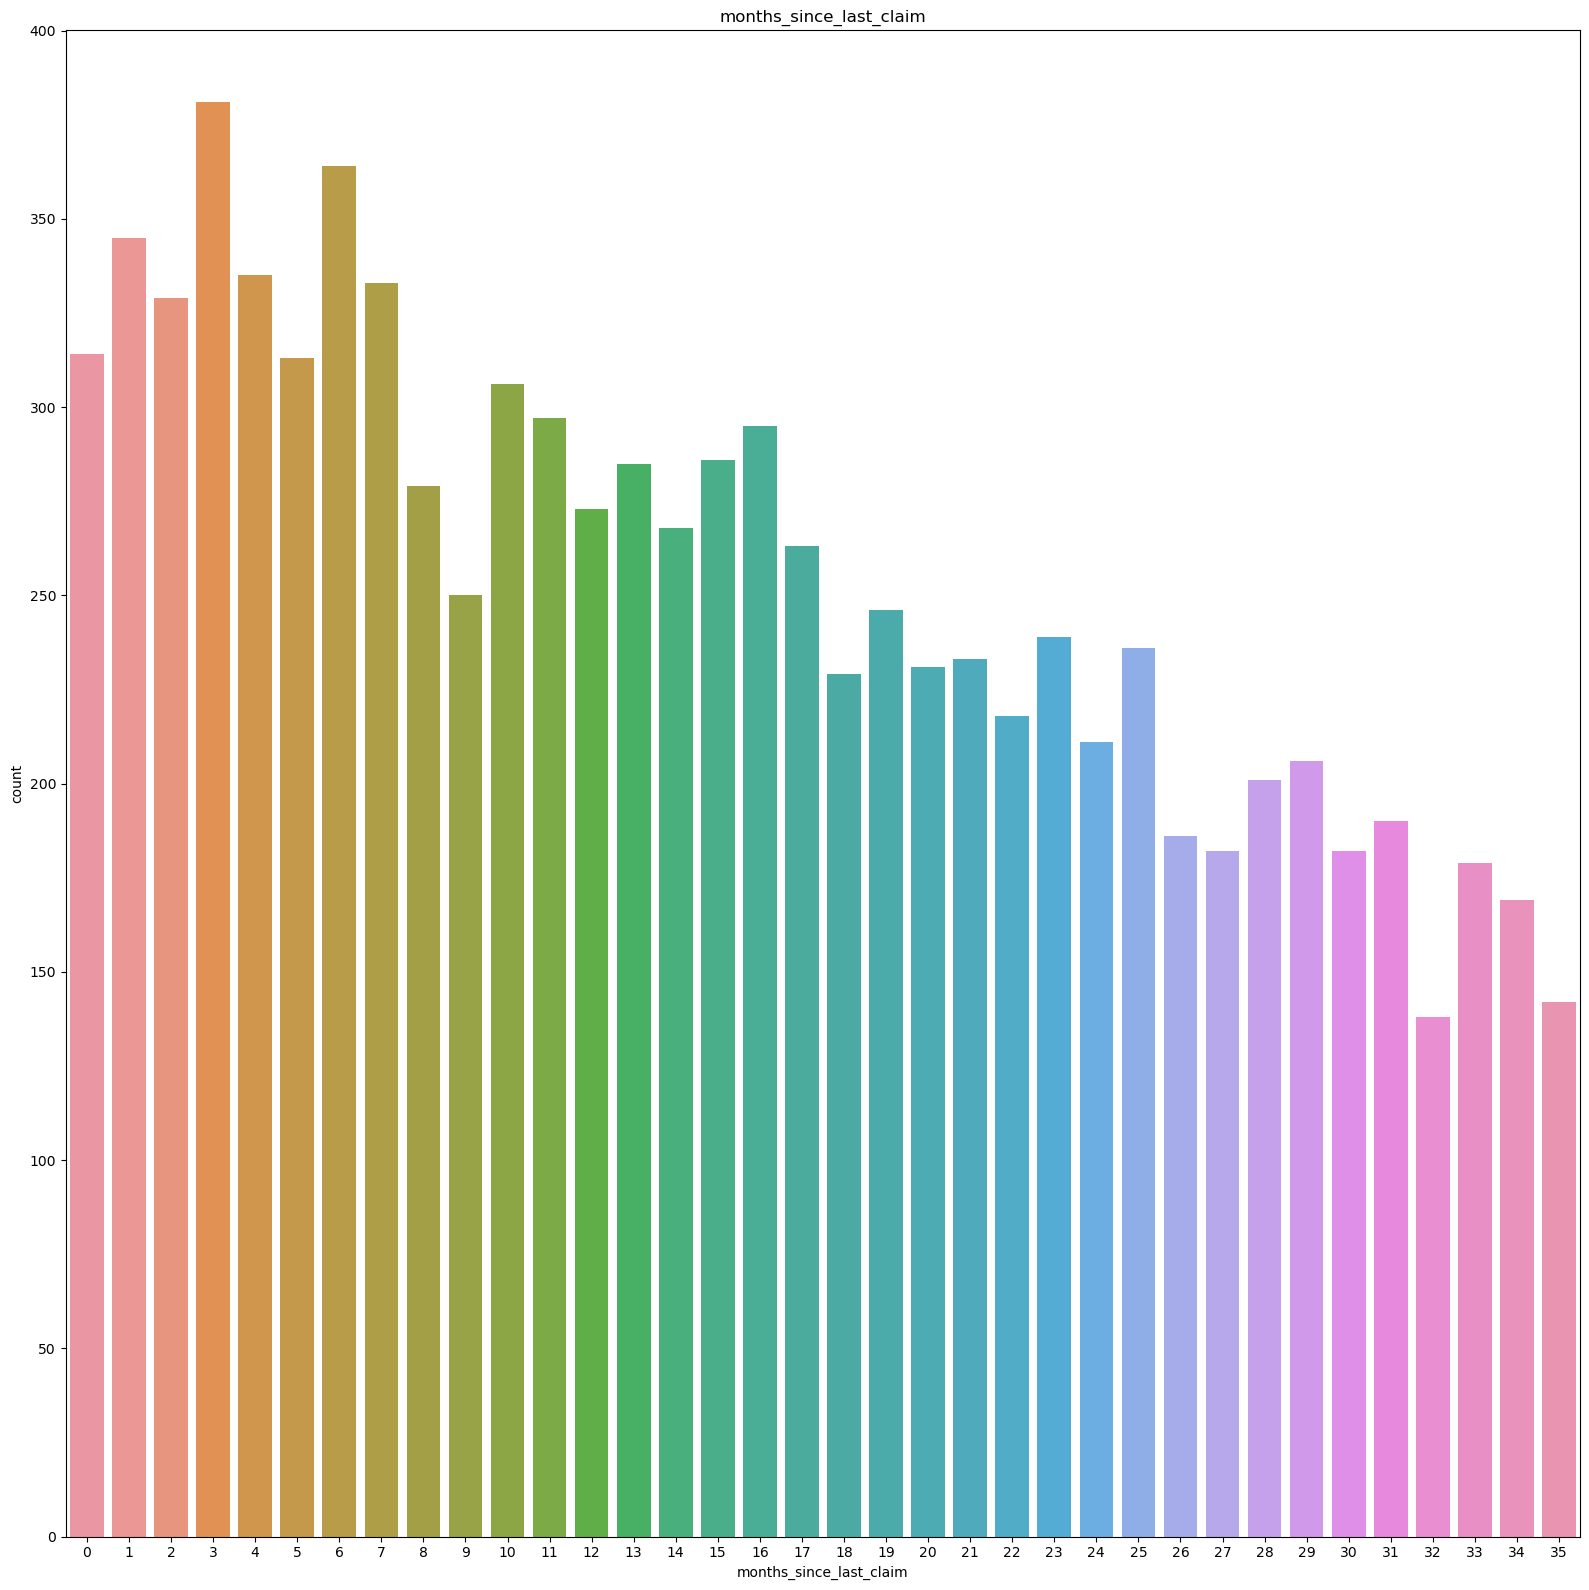

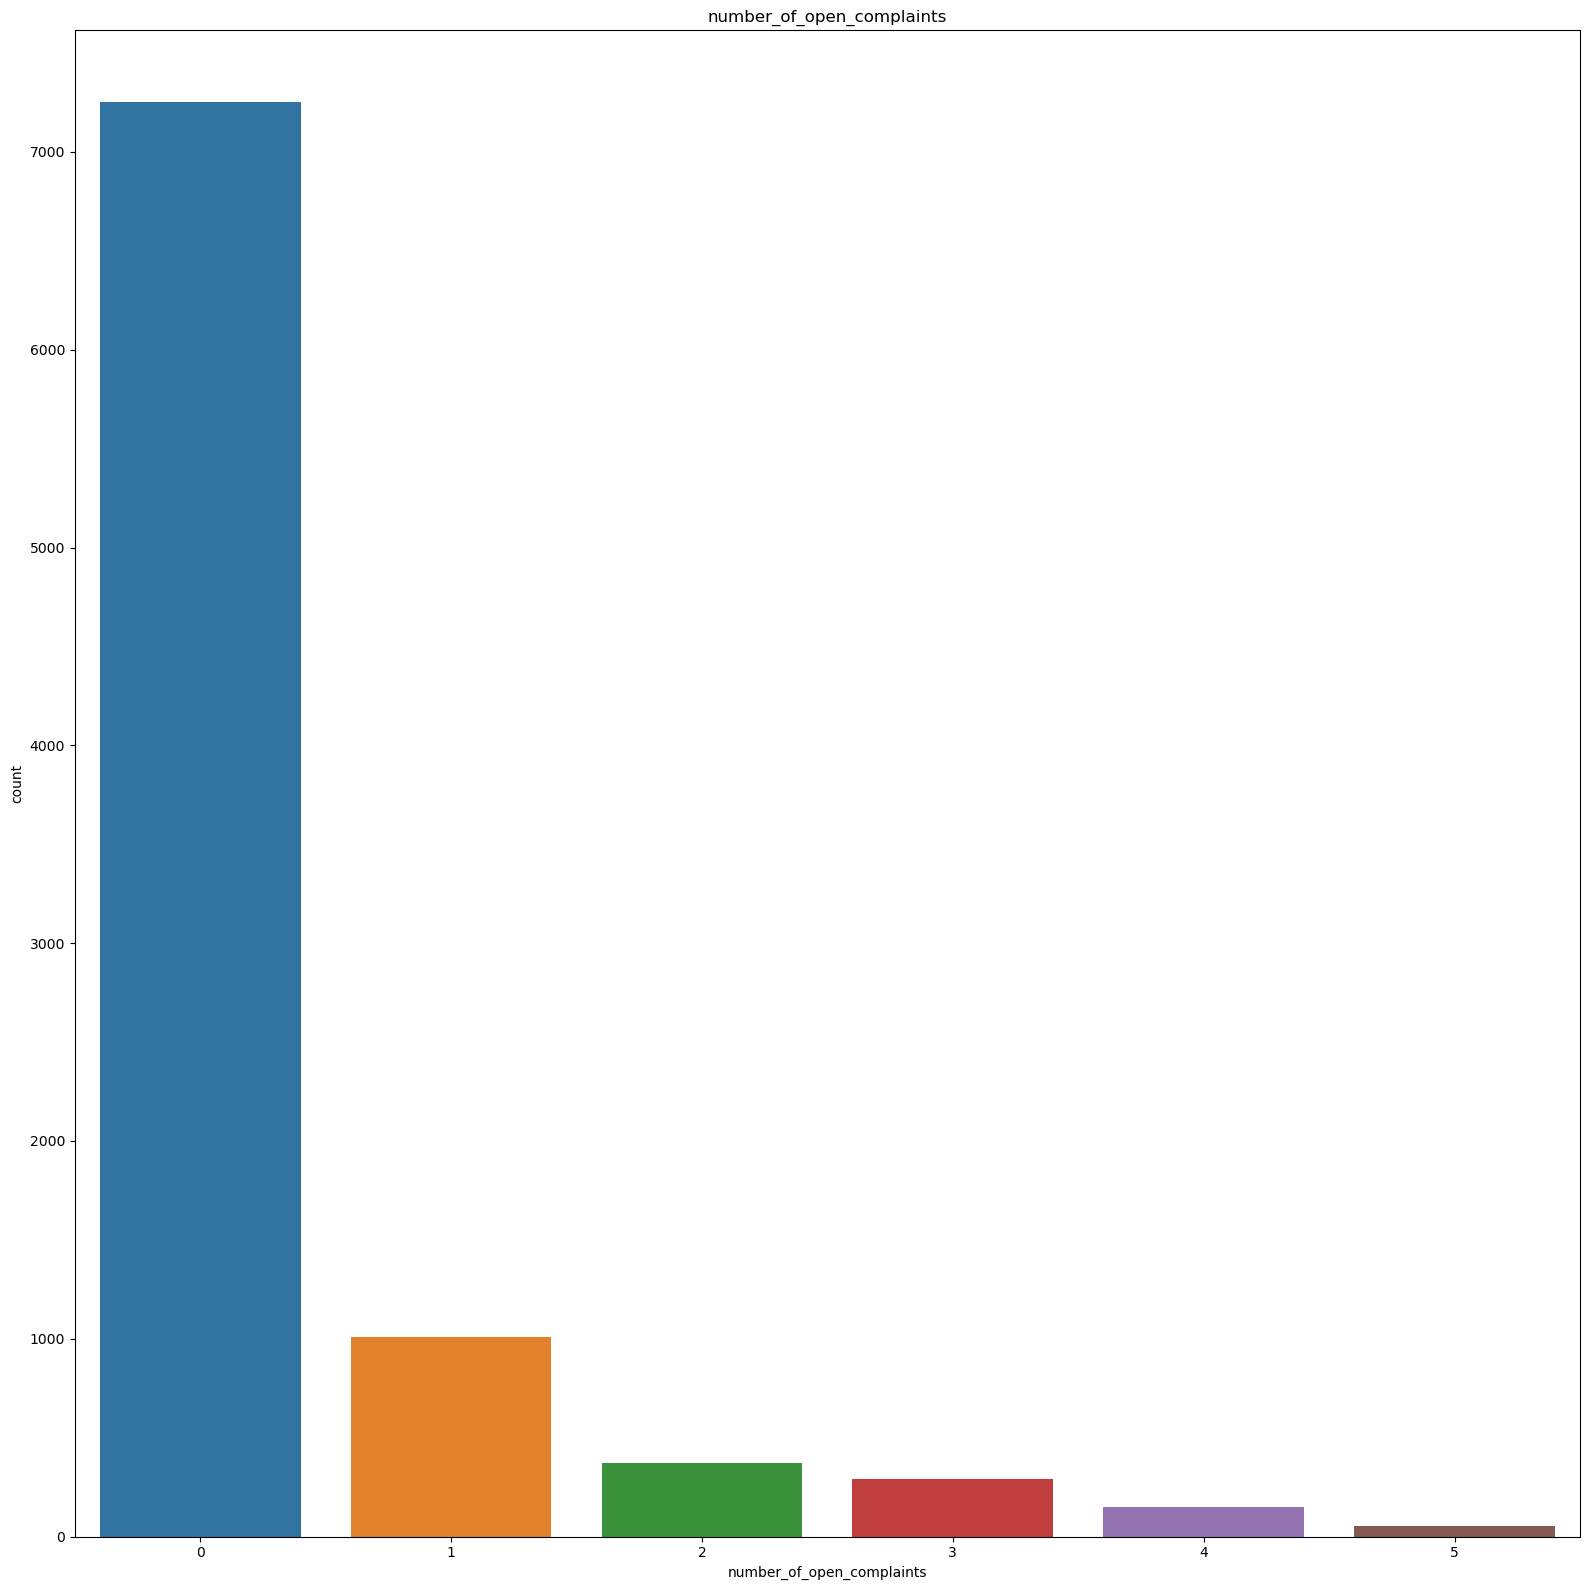

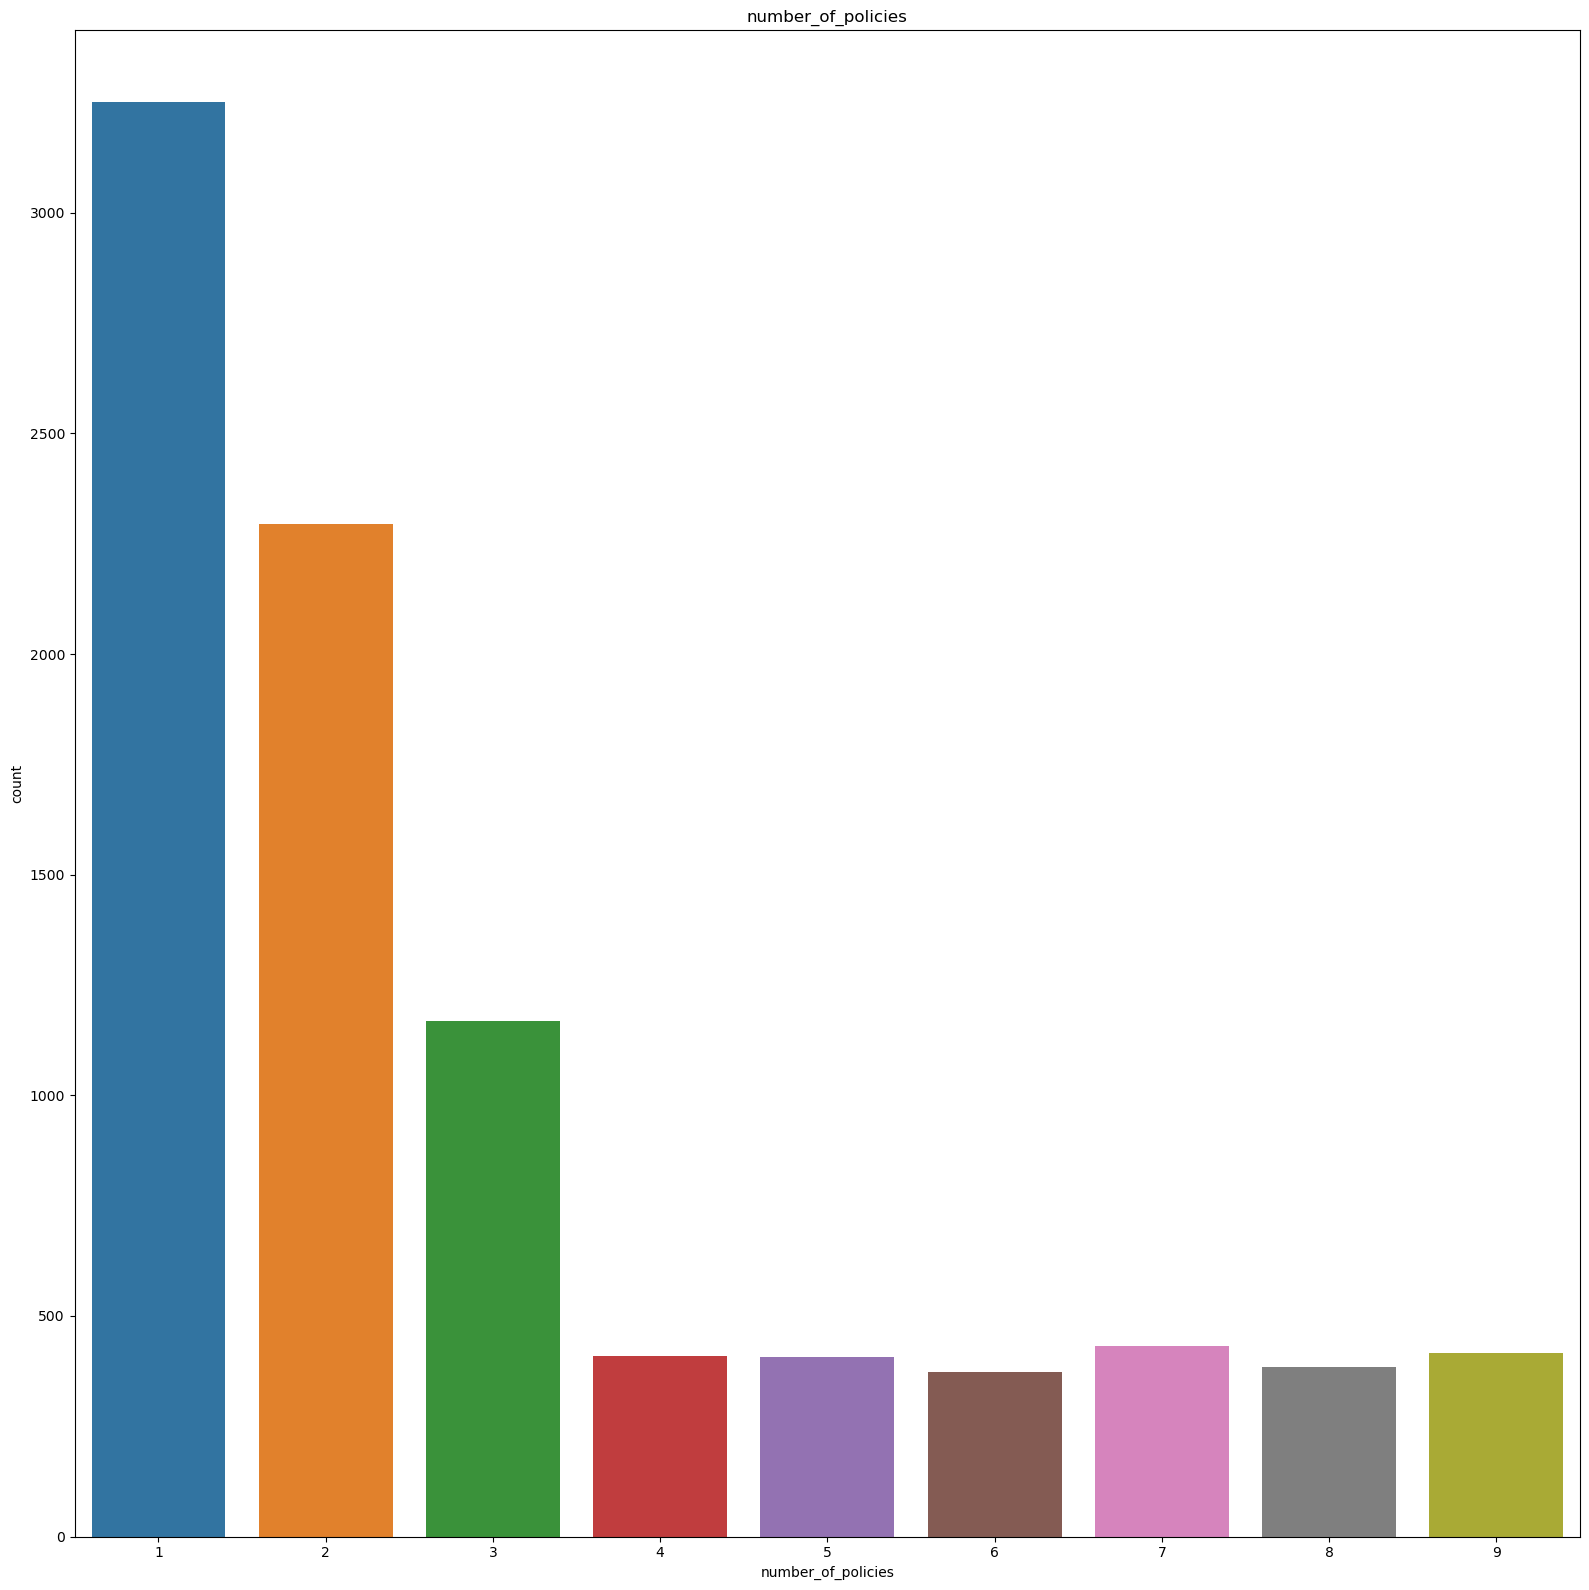

In [25]:
count_plot(discrete_df)

In [26]:
# 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, 
# and set the figuresize = (16,16)

In [27]:
def hist_plot(df: pd.DataFrame) -> None:
    '''
    This function creates histograms for all the columns given through a pd.DataFrame.
    Input: pd.DataFrame
    Output: Histogram for each column. 
    '''
    
    fig, axes = plt.subplots(3, 2, figsize=(16, 16))

    for i, column in enumerate(df.columns):
        row_index = i // 2
        col_index = i % 2
        sns.histplot(data=df, x=column, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(column)

    plt.tight_layout()
    plt.show()

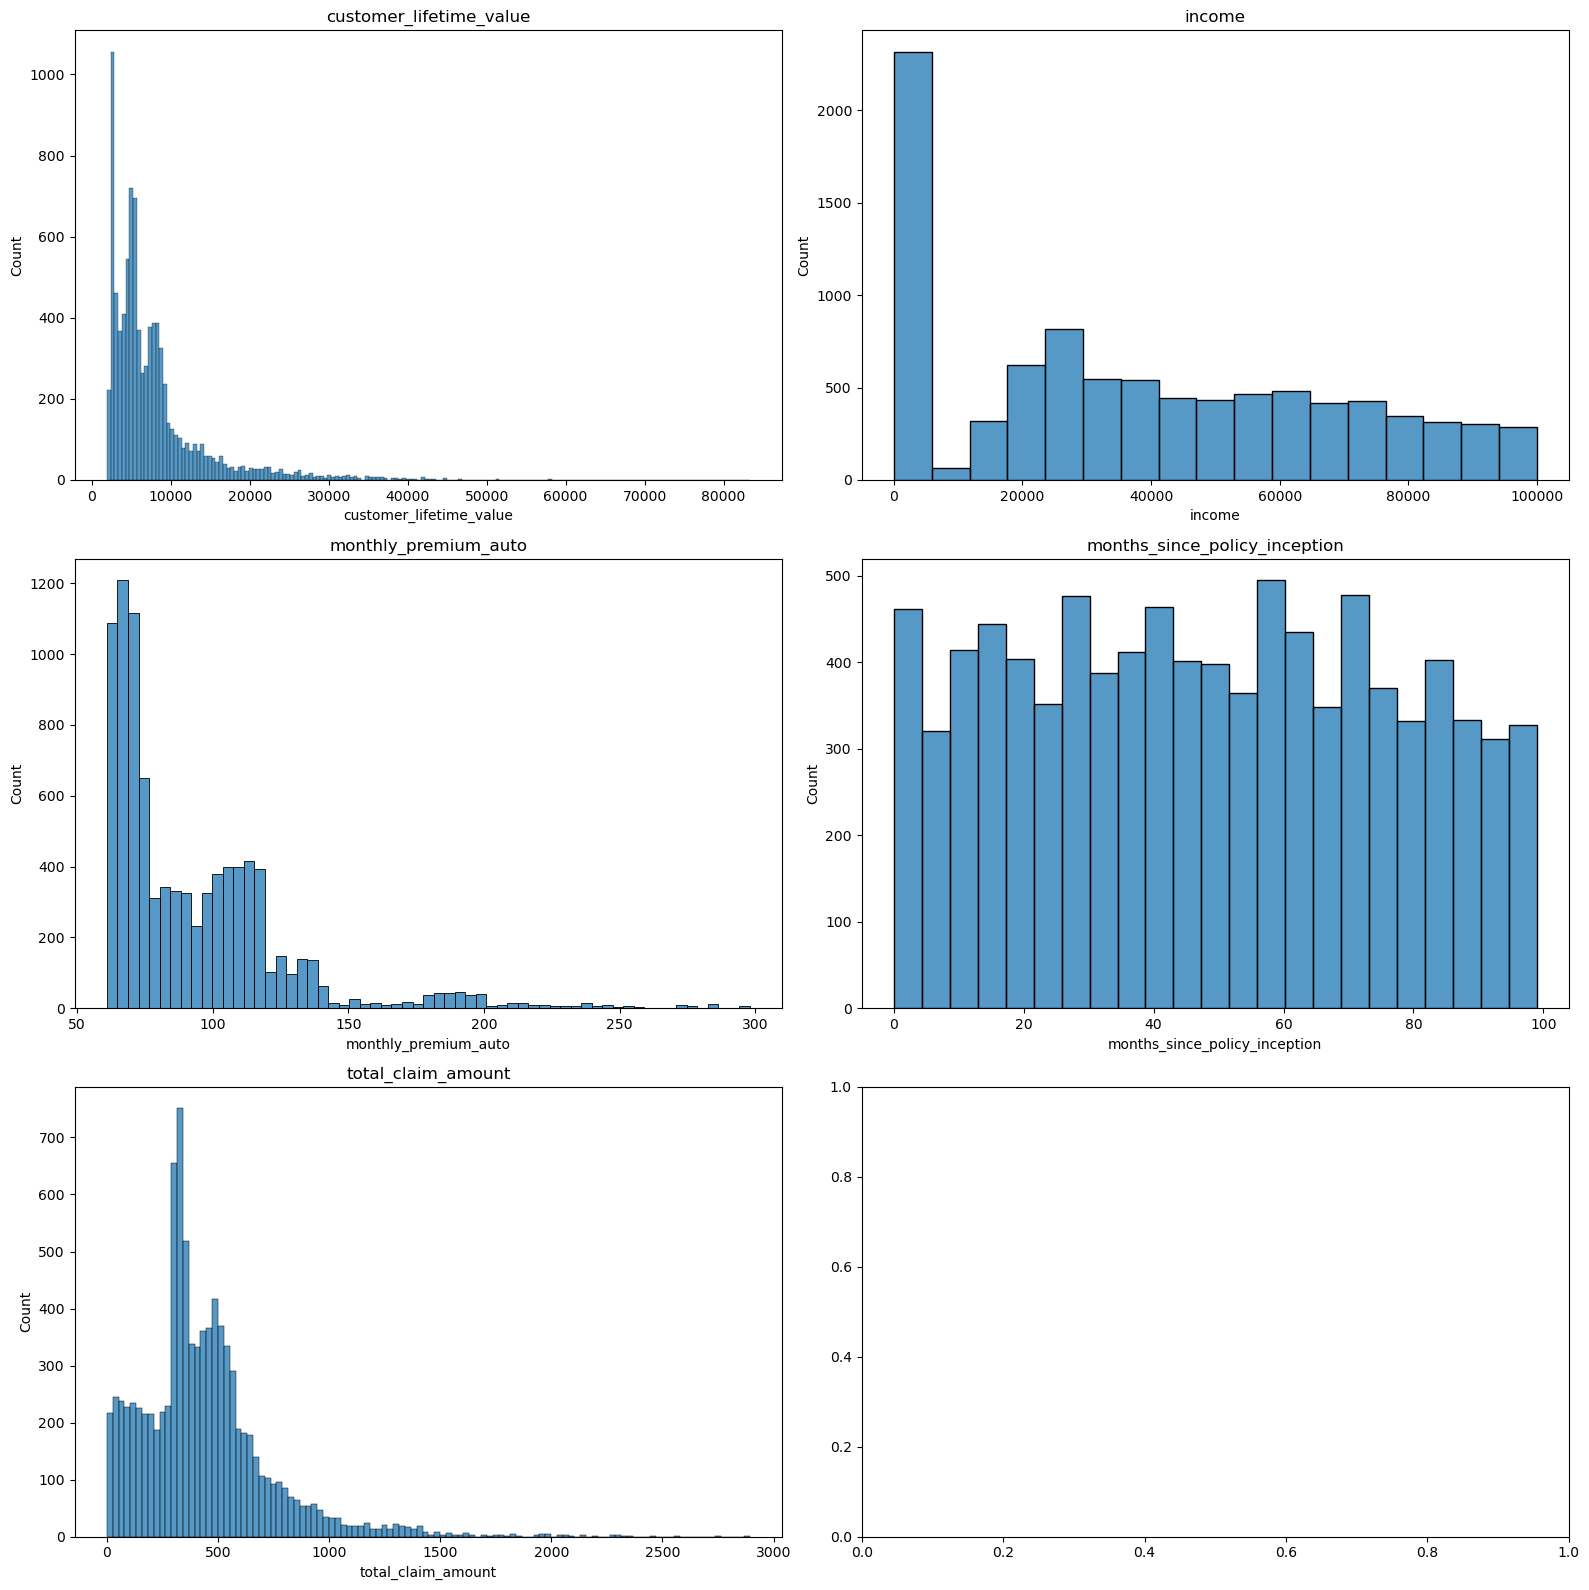

In [28]:
hist_plot(continuous_df)

In [29]:
# 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

In [30]:
# definitely yes, it is possible to see for customer_lifetime_value, monthly_premium_auto and total_claim_amount that they have 
# a long tail, probably with a skewness > 2 and outliers to be dealt with. 

In [31]:
# 14. # 14. Look for outliers in the continuous variables that you have found. 
# Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [32]:
def hist_out_plot(df: pd.DataFrame) -> None:
    '''
    this function plots two types of graphs for the same column, in a way one can compare them: one cab see
    the quartiles means and outliers due to their shared x axis. 
    Input: pd.DataFrame
    Output: Boxplot and histogram for each column. 
    '''

    for column in df.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})
        sns.boxplot(data = df, x = column, ax = ax_box)
        sns.histplot(data = df, x = column, ax = ax_hist)
        plt.show()

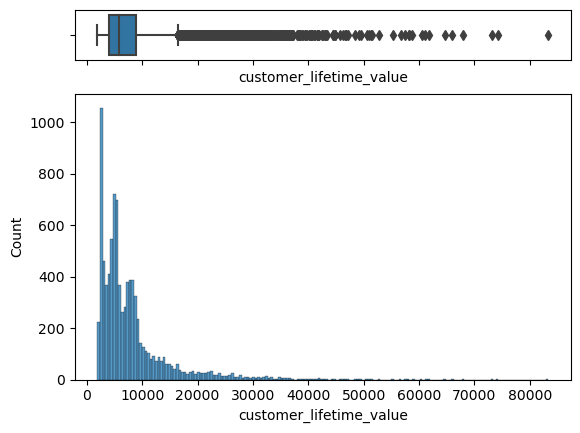

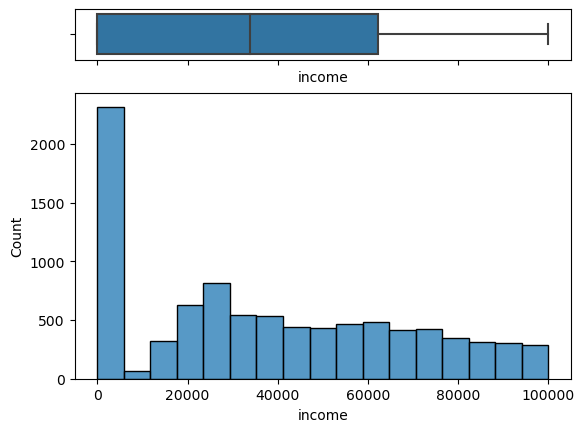

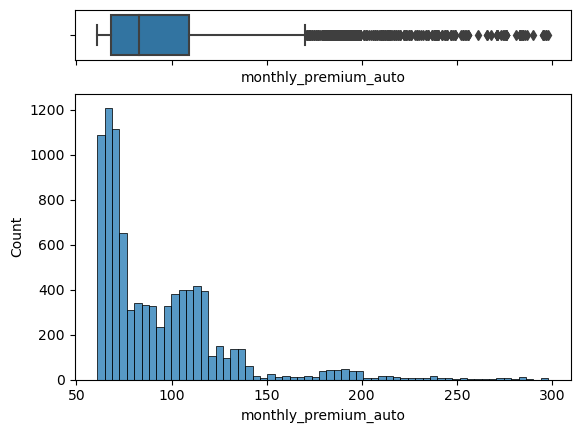

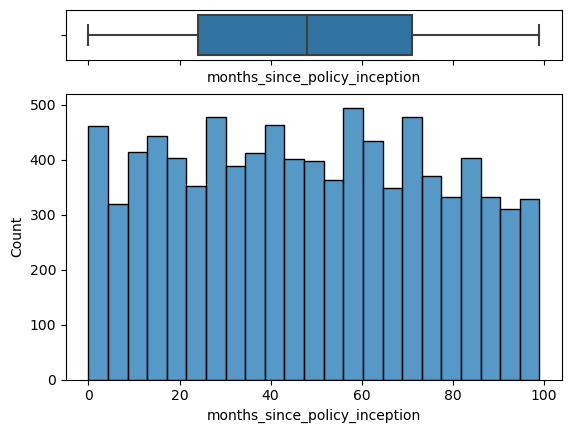

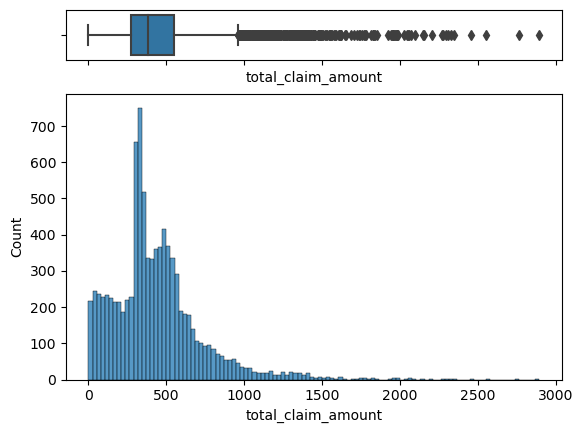

In [33]:
hist_out_plot(continuous_df)